In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# New Section

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

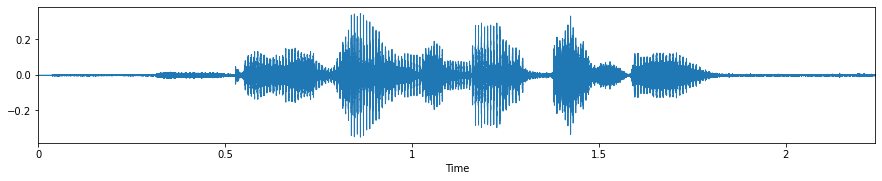

In [ ]:
### Sound
filename='/content/sample_data/Audi/fold1/12.wav'
plt.figure(figsize=(15,2.5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
sample_rate

22050

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [ ]:
wave_sample_rate

48000

In [ ]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [-191,  -60],
       [-231,  -40],
       [-221,  -40]], dtype=int16)

In [ ]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.00294044,
       -0.00275058, -0.00425335], dtype=float32)

In [ ]:
import pandas as pd

metadata=pd.read_csv('/content/sample_data/senCSV 1.csv',dtype={'fold':'Int64','classID':'Int64',})
metadata.head(10)
#metadata['fold'] = metadata['fold'].apply(np.int64)
metadata.dtypes

slice_file_name    object
fold                Int64
classID             Int64
class              object
dtype: object

In [ ]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

तून गावन नाव काय शे      40
यंदा वावर मा काय शे      40
कोणता गावले जाई रायना    40
बठास ले लई ये आते        40
तुले कोनता रंग आवडस      40
Name: class, dtype: int64

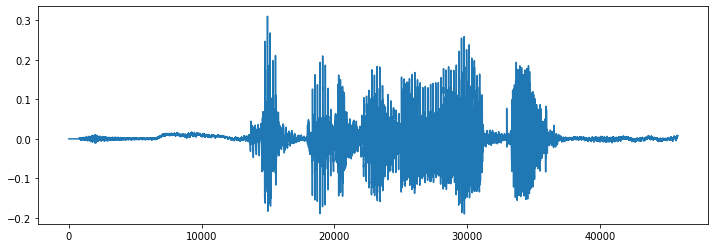

In [ ]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/sample_data/Audi/fold4/12.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)


### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [ ]:

print(librosa_audio_data)

[0.         0.         0.         ... 0.00732328 0.00739817 0.00842183]


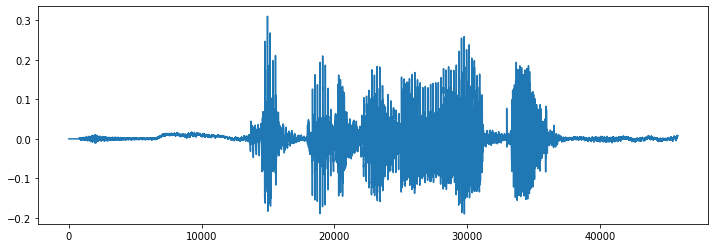

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [ ]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [ ]:
wave_audio

array([[  0,   0],
       [  0,   0],
       [  0,   0],
       ...,
       [191, 311],
       [211, 351],
       [191, 331]], dtype=int16)

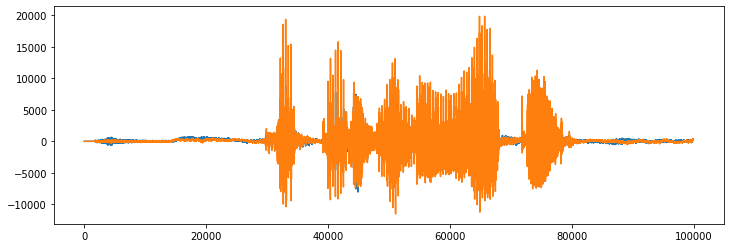

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 90)


In [ ]:
mfccs

array([[-6.6648901e+02, -5.8130139e+02, -5.1289276e+02, ...,
        -5.0377896e+02, -5.1190503e+02, -5.1120840e+02],
       [ 1.1234485e+01,  4.5486813e+01,  3.6735535e+01, ...,
         5.4374386e+01,  5.7361004e+01,  6.3610409e+01],
       [ 1.0524807e+01,  4.9869373e+01,  5.3606407e+01, ...,
         4.7754440e+01,  5.0440895e+01,  5.0255253e+01],
       ...,
       [-7.7376407e-01,  1.1590265e-01,  6.9367838e-01, ...,
         5.1873273e-01,  1.3594167e+00, -3.3568773e+00],
       [-1.0308032e+00,  2.1572001e+00,  1.7813318e+00, ...,
         3.1514657e+00,  1.9488294e+00, -7.3050416e-01],
       [-1.2006918e+00, -1.3635939e+01, -1.5589067e+01, ...,
         6.3475645e-01, -4.0703318e-01, -1.7912405e+00]], dtype=float32)

In [ ]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/content/sample_data/Audi'
metadata=pd.read_csv('/content/sample_data/senCSV 1.csv',dtype={'fold':'Int64','classID':'Int64',})
metadata.head()

,slice_file_name,fold,classID,class
0,1.wav,1,1,तून गावन नाव काय शे
1,2.wav,1,1,तून गावन नाव काय शे
2,3.wav,1,1,तून गावन नाव काय शे
3,4.wav,1,1,तून गावन नाव काय शे
4,5.wav,1,1,तून गावन नाव काय शे


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join((audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

200it [00:12, 15.99it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-386.22495, 92.745, -8.001457, 1.7539119, 0.4...",तून गावन नाव काय शे
1,"[-323.5938, 139.30487, 1.5586737, -3.1546597, ...",तून गावन नाव काय शे
2,"[-303.2111, 131.65727, 3.0458975, -9.203404, -...",तून गावन नाव काय शे
3,"[-293.32773, 116.34885, 4.618874, -0.9361227, ...",तून गावन नाव काय शे
4,"[-313.41382, 125.87175, -1.7183577, 5.2338266,...",तून गावन नाव काय शे


In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(200, 40)

In [ ]:
y

array(['तून गावन नाव काय शे', 'तून गावन नाव काय शे',
       'तून गावन नाव काय शे', 'तून गावन नाव काय शे',
       'तून गावन नाव काय शे', 'तून गावन नाव काय शे',
       'तून गावन नाव काय शे', 'तून गावन नाव काय शे',
       'तून गावन नाव काय शे', 'तून गावन नाव काय शे',
       'तून गावन नाव काय शे', 'तून गावन नाव काय शे',
       'तून गावन नाव काय शे', 'तून गावन नाव काय शे',
       'तून गावन नाव काय शे', 'तून गावन नाव काय शे',
       'तून गावन नाव काय शे', 'तून गावन नाव काय शे',
       'तून गावन नाव काय शे', 'तून गावन नाव काय शे',
       'तून गावन नाव काय शे', 'तून गावन नाव काय शे',
       'तून गावन नाव काय शे', 'तून गावन नाव काय शे',
       'तून गावन नाव काय शे', 'तून गावन नाव काय शे',
       'तून गावन नाव काय शे', 'तून गावन नाव काय शे',
       'तून गावन नाव काय शे', 'तून गावन नाव काय शे',
       'तून गावन नाव काय शे', 'तून गावन नाव काय शे',
       'तून गावन नाव काय शे', 'तून गावन नाव काय शे',
       'तून गावन नाव काय शे', 'तून गावन नाव काय शे',
       'तून गावन नाव काय शे', 'तून गावन नाव का

In [ ]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:

y

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0.

In [ ]:

### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:

X_train

array([[-4.26917694e+02,  7.25084000e+01,  2.97569752e+01, ...,
        -3.58123398e+00,  1.30137181e+00, -3.27549028e+00],
       [-4.22216034e+02,  1.27091156e+02,  1.07445087e+01, ...,
        -2.64359760e+00, -1.88188052e+00, -2.34467879e-01],
       [-4.21773590e+02,  1.23491722e+02,  8.38400173e+00, ...,
         9.81826305e-01, -1.29694223e+00,  4.36274499e-01],
       ...,
       [-4.15864319e+02,  1.22940666e+02, -2.87021279e+00, ...,
        -5.39152050e+00, -6.82407475e+00, -5.02931261e+00],
       [-3.55122925e+02,  9.85553131e+01, -3.43914070e+01, ...,
         1.51354206e+00,  2.85169220e+00, -1.43851650e+00],
       [-4.20514679e+02,  9.68359604e+01,  2.98323822e+01, ...,
        -3.32274055e+00,  1.75099528e+00, -1.87939560e+00]], dtype=float32)

In [ ]:
y

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0.

In [ ]:
X_train.shape

(160, 40)

In [ ]:

X_test.shape

(40, 40)

In [ ]:
y_train.shape

(160, 5)

In [ ]:
y_test.shape

(40, 5)

Model Creation

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 550
num_batch_size = 10

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/550
 1/16 [>.............................] - ETA: 0s - loss: 1.6268 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 1.62517, saving model to saved_models/audio_classification.hdf5
16/16 [==============================] - 0s 8ms/step - loss: 1.6042 - accuracy: 0.2125 - val_loss: 1.6252 - val_accuracy: 0.1500
Epoch 2/550
 1/16 [>.............................] - ETA: 0s - loss: 1.6267 - accuracy: 0.2000
Epoch 2: val_loss did not improve from 1.62517
16/16 [==============================] - 0s 4ms/step - loss: 1.6078 - accuracy: 0.2125 - val_loss: 1.6252 - val_accuracy: 0.1500
Epoch 3/550
 1/16 [>.............................] - ETA: 0s - loss: 1.6239 - accuracy: 0.1000
Epoch 3: val_loss did not improve from 1.62517
16/16 [==============================] - 0s 5ms/step - loss: 1.6409 - accuracy: 0.2125 - val_loss: 1.6255 - val_accuracy: 0.1500
Epoch 4/550
 1/16 [>.............................] - ETA: 0s - loss: 1.6016 - accuracy: 0.1000
Epoch 4: val_loss did not improv

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1]*100)

15.000000596046448


In [ ]:
X_test[1]

array([-3.9447412e+02,  1.0007276e+02,  3.7496006e+01,  9.0889502e+00,
        9.1223993e+00,  1.1500171e+01, -4.8976603e+00,  1.1032603e+01,
       -1.4314990e+01,  5.7094507e+00, -1.1222354e+01,  1.9666817e+01,
       -5.9459839e+00,  2.9476926e+00,  8.9499817e+00,  8.5623064e+00,
       -7.2319984e+00,  6.2692046e+00, -9.4650459e+00, -2.5865364e+00,
       -6.7240682e+00,  5.8124647e+00, -7.0340929e+00,  2.0516643e-01,
       -4.7907786e+00, -1.4159577e+00, -6.1059636e-01, -1.4965588e+00,
       -7.0295415e+00, -1.4215398e+00, -1.7587335e+00, -3.8742712e+00,
       -1.4845141e+00, -3.2890294e+00, -3.4446297e+00, -2.2774749e+00,
       -1.6902919e+00, -1.6959424e+00, -1.3871047e+00, -1.7637700e+00],
      dtype=float32)

In [ ]:
model.predict(X_test)

array([[0.21230692, 0.1997969 , 0.19381458, 0.18158142, 0.21250014],
       [0.21230692, 0.1997969 , 0.19381458, 0.18158142, 0.21250014],
       [0.21230692, 0.1997969 , 0.19381458, 0.18158142, 0.21250014],
       [0.21230692, 0.1997969 , 0.19381458, 0.18158142, 0.21250014],
       [0.21230692, 0.1997969 , 0.19381458, 0.18158142, 0.21250014],
       [0.21230692, 0.1997969 , 0.19381458, 0.18158142, 0.21250014],
       [0.21230692, 0.1997969 , 0.19381458, 0.18158142, 0.21250014],
       [0.21230692, 0.1997969 , 0.19381458, 0.18158142, 0.21250014],
       [0.21230692, 0.1997969 , 0.19381458, 0.18158142, 0.21250014],
       [0.21230692, 0.1997969 , 0.19381458, 0.18158142, 0.21250014],
       [0.21230692, 0.1997969 , 0.19381458, 0.18158142, 0.21250014],
       [0.21230692, 0.1997969 , 0.19381458, 0.18158142, 0.21250014],
       [0.21230692, 0.1997969 , 0.19381458, 0.18158142, 0.21250014],
       [0.21230692, 0.1997969 , 0.19381458, 0.18158142, 0.21250014],
       [0.21230692, 0.1997969 , 0.

Testing Some Test Audio Data
Steps

Preprocess the new audio data
predict the classes
Invere transform your Predicted Label

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
filename="/content/sample_data/Audi/fold5/12.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
#print("mfccs scaled features")
#print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#print(mfccs_scaled_features)
#print("mfccs scaled features shapes")
#print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
predicted_label=np.argmax(predicted_label,axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class     

[4]


array(['यंदा वावर मा काय शे'], dtype='<U21')

In [ ]:
"""if predicted_label == [1]:
  print("अग्निः")
if predicted_label == [2]:
  print("छात्राः ")
if predicted_label == [3]:
  print("जीवनम्")
if predicted_label == [4]:
  print("नमो नमः")
if predicted_label == [5]:
  print("सौभाग्यम् ")"""

In [ ]:
!pip install ffmpeg-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# all imports
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode


RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=1):
  #display(HTML(RECORD))
  print("Speak the word, Recording has started.")
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  print("Recording Stopped !")
  b = b64decode(s.split(',')[1])
  with open('audio.wav','wb') as f:
    f.write(b)
  return 'audio.wav'  # or webm ?
record()


Speak the word, Recording has started.


<IPython.core.display.Javascript object>

Recording Stopped !


'audio.wav'

In [ ]:
import matplotlib.pyplot as plt

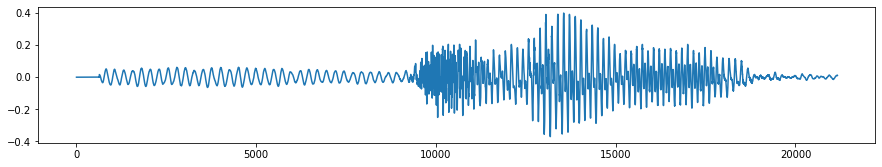

In [ ]:
plt.figure(figsize=(15,2.5))
plt.plot(audio)
plt.show()

In [ ]:
# Play wave
import IPython

IPython.display.Audio('/content/audio.wav') # This is required on Google Colab due to compatibility issues


In [ ]:
#filename="/content/audio.wav"
filename="/content/audio.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
#print("mfccs scaled features")
#print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#print(mfccs_scaled_features)
#print("mfccs scaled features shapes")
#print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
predicted_label=np.argmax(predicted_label,axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class  
print(prediction_class )

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: ignored

In [ ]:
"""for i in range(0,5):
  predicted_label=[i]

  prediction_class = labelencoder.inverse_transform(predicted_label) 

  print(predicted_label)
  print(prediction_class)"""


"""if predicted_label == array(['Agni'])
  print("अग्निः")
if predicted_label == [2]:
  print("छात्राः ")
if predicted_label == [3]:
  print("जीवनम्")
if predicted_label == [4]:
  print("नमो नमः")
if predicted_label == [5]:
  print("सौभाग्यम् ")"""

नमो नमः


In [ ]:
model.save("Mahesh.h5")

In [ ]:
#!unzip "/content/sample_data/tryerr/अग्नी_संस्कृत_Dataset_121_to_130_Abhay.zip"

Archive:  /content/sample_data/tryerr/अग्नी_संस्कृत_Dataset_121_to_130_Abhay.zip
  inflating: рдЕрдЧреНрдиреА рд╕рдВрд╕реНрдХреГрдд Dataset 21 to 30 Abhay/121.wav  
  inflating: рдЕрдЧреНрдиреА рд╕рдВрд╕реНрдХреГрдд Dataset 21 to 30 Abhay/122.wav  
  inflating: рдЕрдЧреНрдиреА рд╕рдВрд╕реНрдХреГрдд Dataset 21 to 30 Abhay/123.wav  
  inflating: рдЕрдЧреНрдиреА рд╕рдВрд╕реНрдХреГрдд Dataset 21 to 30 Abhay/124.wav  
  inflating: рдЕрдЧреНрдиреА рд╕рдВрд╕реНрдХреГрдд Dataset 21 to 30 Abhay/125.wav  
  inflating: рдЕрдЧреНрдиреА рд╕рдВрд╕реНрдХреГрдд Dataset 21 to 30 Abhay/126.wav  
  inflating: рдЕрдЧреНрдиреА рд╕рдВрд╕реНрдХреГрдд Dataset 21 to 30 Abhay/127.wav  
  inflating: рдЕрдЧреНрдиреА рд╕рдВрд╕реНрдХреГрдд Dataset 21 to 30 Abhay/128.wav  
  inflating: рдЕрдЧреНрдиреА рд╕рдВрд╕реНрдХреГрдд Dataset 21 to 30 Abhay/129.wav  
  inflating: рдЕрдЧреНрдиреА рд╕рдВрд╕реНрдХреГрдд Dataset 21 to 30 Abhay/130.wav  


**
Noise Reduction
**

In [ ]:
colab_requirements = [
    "pip install librosa",
    "pip install noisereduce",
    "pip install soundfile",

]

import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


In [ ]:
url = "/content/sample_data/fold1/125.wav"
response = urllib.request.urlopen(url)
data, rate = sf.read(io.BytesIO(response.read()))
data = data

ValueError: ignored

# Before Noise removal

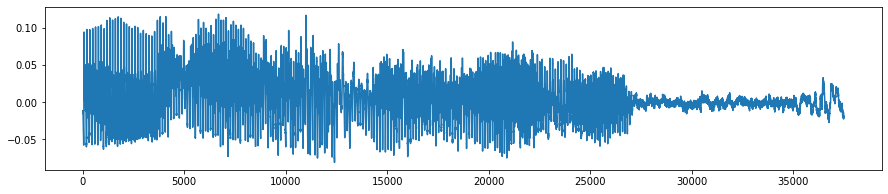

In [ ]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/sample_data/Audi/fold4/116.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)


### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(15, 3))
plt.plot(librosa_audio_data)

# removing noise

In [ ]:
!pip install noisereduce
from scipy.io import wavfile
import noisereduce as nr
# load data
rate, data = wavfile.read("/content/sample_data/fold1/102.wav")
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
wavfile.write("reduced_noise.wav", rate, reduced_noise)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


# After Noise removal: Comparasion betn both signals


compare


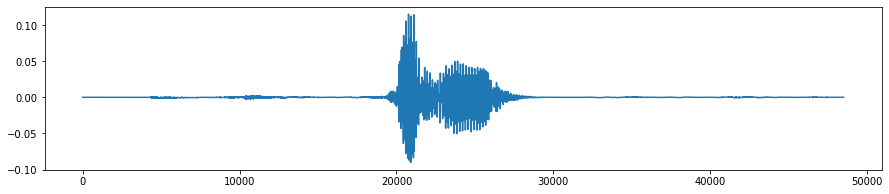

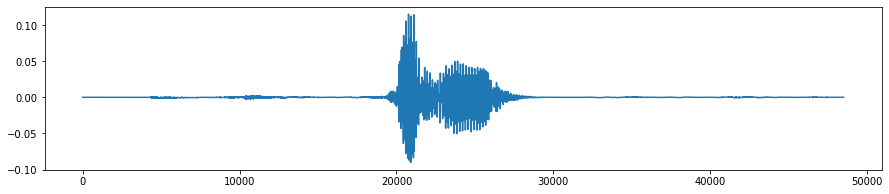

In [ ]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/reduced_noise.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)


### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(15, 3))
plt.plot(librosa_audio_data)


print('compare')


### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/reduced_noise.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)


### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(15, 3))
plt.plot(librosa_audio_data)

